Created on Thu May  3 17:22:40 2024 

@author: boudy

[ENSIIE-PRBI24] | TP SVM

Binôme: **CHEAM Richard & NOUV Ratanakmuny**

## Partie II : Simulation de l’algorithme SVM sous Python (partie TP)

### Question 5

In [2]:
from pylab import *
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

In [3]:
########### Données d'Apprentissage et de Test indépendantes pour le SVM ##########

#------- Jeu de données n°1 --------
#--- Apprentissage à partir de 8 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X1 = [[15, 42], [15, 45], [14, 61], [3, 70], [0, 30], [15, 10], [4, 38], [2, 42]]
y1 = [0, 0, 0, 0, 1, 1, 1, 1] #4 premiers sont normales

# Données de Test (prédiction)
Lab_reels1 = [0, 1, 1, 1, 0]
#X_test1=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 41]]
X_test1=[[15., 60.], [2., 22.], [4, 39], [0, 40], [15, 36]]

#------- Jeu de données n°2 --------
#--- Apprentissage à partir de 16 exemples de dimension N=2 Feature X=(Mvt,Pouls)
X2 = [[15, 42], [15, 41], [14, 61], [3, 70], [13, 40], [14, 43], [11, 65], [3, 70], [0, 58], [15, 37], [4, 38], [2, 42], [2, 59], [13, 33], [5, 38], [0, 35]]
y2 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels2 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test2=[[15., 60.], [2., 42.], [4, 39], [2, 35], [15, 36], [14, 39], [3, 80], [3, 60]]

#------- Jeu de données n°3 --------
#--- Apprentissage à partir de 16 exemples de dimension N=3 Feature X=(Mvt,Pouls, SpO2)
X3 = [[15, 56, 92], [15, 58, 93], [14, 61, 90], [3, 70, 89], [13, 41, 86], [14, 70, 91], [11, 65, 92], [3, 70, 90], [0, 58, 85], [15, 37, 80], [4, 38, 75], [2, 42, 84], [2, 40, 85], [13, 33, 74], [5, 38, 84], [0, 35, 80]]
y3 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

# Données de Test (prédiction)
Lab_reels3 = [0, 0, 1, 1, 1, 1, 0, 0]
X_test3=[[15., 60., 90.], [2., 42., 89.], [4., 39., 75.], [2., 35., 80.], [15., 36., 82.], [14., 39., 79.], [3., 80., 91.], [3., 60.,93.]]

In [3]:
# functions to train model and make prediction for 3 different kernel

def linear_SVM(X, y, X_test, Lab_reels):
    clf = svm.SVC(kernel='linear')
    clf.fit(X, y)
    # get support vectors
    SV=clf.support_vectors_
    print("Support vector:\n",SV)
    # get indices of support vectors
    Index_SV=clf.support_
    print("Index SV:", Index_SV)
    # get number of support vectors for each class
    Number_SV=clf.n_support_
    print("Number of support vectors for each class:", Number_SV)
    # ------ Prediction  (Test) -----
    Lab_pred_lin=clf.predict(X_test)
    delta_Lab = Lab_pred_lin - Lab_reels
    print('Erreurs Kernel Linéaire :', delta_Lab)
    Nb_erreurs=sum(abs(delta_Lab))
    Taux_erreurs=Nb_erreurs/size(Lab_reels)
    Taux_Reco=(1-Taux_erreurs)*100
    print('Taux_Reco Noyau Linéaire en % :',Taux_Reco)
    print("Accuracy of linear kernel :", metrics.accuracy_score(Lab_reels, Lab_pred_lin))
    return 

def polynomial_SVM(X, y, X_test, Lab_reels):
    clf = svm.SVC(kernel='poly') #degree = 3 by default
    clf.fit(X, y)
    # get support vectors
    SV=clf.support_vectors_
    print("Support vector:\n",SV)
    # get indices of support vectors
    Index_SV=clf.support_
    print("Index SV:", Index_SV)
    # get number of support vectors for each class
    Number_SV=clf.n_support_
    print("Number of support vectors for each class:", Number_SV)
    # ------ Prediction  (Test) -----
    Lab_pred_lin=clf.predict(X_test)
    delta_Lab = Lab_pred_lin - Lab_reels
    print('Erreurs Kernel Polynomiale :', delta_Lab)
    Nb_erreurs=sum(abs(delta_Lab))
    Taux_erreurs=Nb_erreurs/size(Lab_reels)
    Taux_Reco=(1-Taux_erreurs)*100
    print('Taux_Reco Noyau Polynomiale en % :',Taux_Reco)
    print("Accuracy of polynomial kernel :", metrics.accuracy_score(Lab_reels, Lab_pred_lin))
    return  

def gaussian_SVM(X, y, X_test, Lab_reels):
    clf = svm.SVC(kernel='rbf')
    clf.fit(X, y)
    # get support vectors
    SV=clf.support_vectors_
    print("Support vector:\n",SV)
    # get indices of support vectors
    Index_SV=clf.support_
    print("Index SV:", Index_SV)
    # get number of support vectors for each class
    Number_SV=clf.n_support_
    print("Number of support vectors for each class:", Number_SV)
    # ------ Prediction  (Test) -----
    Lab_pred_lin=clf.predict(X_test)
    delta_Lab = Lab_pred_lin - Lab_reels
    print('Erreurs Kernel RBF :', delta_Lab)
    Nb_erreurs=sum(abs(delta_Lab))
    Taux_erreurs=Nb_erreurs/size(Lab_reels)
    Taux_Reco=(1-Taux_erreurs)*100
    print('Taux_Reco Noyau RBF en % :',Taux_Reco)
    print("Accuracy of RBF kernel :", metrics.accuracy_score(Lab_reels, Lab_pred_lin))
    return 

In [4]:
print("################ Jeu de données n°1 ################\n")
# Noyau Linéaire
print("------- Noyau Linéaire -------")
linear_SVM(X1, y1, X_test1, Lab_reels1) 
print("\n")
# Noyau Polynomiale 
print("------- Noyau Polynomiale -------")
polynomial_SVM(X1, y1, X_test1, Lab_reels1) 

################ Jeu de données n°1 ################

------- Noyau Linéaire -------
Support vector:
 [[15. 42.]
 [ 3. 70.]
 [ 4. 38.]]
Index SV: [0 3 6]
Number of support vectors for each class: [2 1]
Erreurs Kernel Linéaire : [0 0 0 0 0]
Taux_Reco Noyau Linéaire en % : 100.0
Accuracy of linear kernel : 1.0


------- Noyau Polynomiale -------
Support vector:
 [[15. 42.]
 [ 4. 38.]
 [ 2. 42.]]
Index SV: [0 6 7]
Number of support vectors for each class: [1 2]
Erreurs Kernel Polynomiale : [0 0 0 0 0]
Taux_Reco Noyau Polynomiale en % : 100.0
Accuracy of polynomial kernel : 1.0


* From the result above, for linear kernel, there are 3 support vectors in total out of 8:
    * Two of them are from normal class (0): [15, 42] [3, 70] 
    * One is from abnormal class(1): [4, 38]
* For 3rd degree polynomial kernel there are 3 support vectors in total out of 8:
    * One of them is from normal class (0): [15, 42] 
    * Two of them are from abnormal class(1): [4, 38], [2, 42]
* The same support vector of normal class ([15, 42]) and abnormal class ([4, 38]) were chosen. The difference is the support vector of abnormal class ([2, 42]). However, despite the fact that linear kernel chose 2 out of 3 support vectors from class 0 and polynomial chose 2 out of 3 support vectors from class 1, the predictions are both 100% between polynomial and linear kernel.

In [5]:
# Noyau Gaussian
print("------- Noyau RBF --------")
gaussian_SVM(X1, y1, X_test1, Lab_reels1) 

------- Noyau RBF --------
Support vector:
 [[15. 42.]
 [15. 45.]
 [14. 61.]
 [ 3. 70.]
 [ 0. 30.]
 [15. 10.]
 [ 4. 38.]
 [ 2. 42.]]
Index SV: [0 1 2 3 4 5 6 7]
Number of support vectors for each class: [4 4]
Erreurs Kernel RBF : [0 0 0 0 1]
Taux_Reco Noyau RBF en % : 80.0
Accuracy of RBF kernel : 0.8


* Whereas, for rbf kernel, every vector was chosen, 8 in total. 
* The number of support vectors were equally chosen between each class, 0 (normal) and 1 (abnormal). 
* However, the accuracy of prediction drop from 100% (linear or polynomial) to 80% (rbf).

In [6]:
print("################ Jeu de données n°2 ################\n")
print("------- Noyau Linéaire --------")
# Noyau Linéaire
linear_SVM(X2, y2, X_test2, Lab_reels2) 

################ Jeu de données n°2 ################

------- Noyau Linéaire --------
Support vector:
 [[13. 40.]
 [14. 43.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]]
Index SV: [ 4  5  9 12 13]
Number of support vectors for each class: [2 3]
Erreurs Kernel Linéaire : [ 0  1  0  0 -1 -1  0  1]
Taux_Reco Noyau Linéaire en % : 50.0
Accuracy of linear kernel : 0.5


* From the result above, there are 5 support vectors in total out of 16:
    * Two of them are from normal class (0): [13, 40], [14, 43] 
    * Three of them are from abnormal class (1): [15, 37], [2, 59], [13, 33]
* The prediction is 50% accurate.

In [7]:
# Noyau Polynomiale
print("------- Noyau Polynomiale -------")
polynomial_SVM(X2, y2, X_test2, Lab_reels2) 

------- Noyau Polynomiale -------
Support vector:
 [[15. 41.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [15. 37.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
Index SV: [ 1  4  5  7  9 12 13 14]
Number of support vectors for each class: [4 4]
Erreurs Kernel Polynomiale : [ 0  1  0  0 -1 -1  0  0]
Taux_Reco Noyau Polynomiale en % : 62.5
Accuracy of polynomial kernel : 0.625


* Whereas, for polynomial kernel, 8 support vectors were chosen 4 of them are from normal class (0) and the other 4 are from abnormal class (1). Hence, the decision boundary between the classes is equally influenced by the data points from both classes.
* We notice that polynomial kernel performs better than the linear in which it has 62.5.  


In [8]:
print("------- Noyau RBF --------")
gaussian_SVM(X2, y2, X_test2, Lab_reels2) 

------- Noyau RBF --------
Support vector:
 [[15. 42.]
 [15. 41.]
 [14. 61.]
 [ 3. 70.]
 [13. 40.]
 [14. 43.]
 [ 3. 70.]
 [ 0. 58.]
 [15. 37.]
 [ 4. 38.]
 [ 2. 42.]
 [ 2. 59.]
 [13. 33.]
 [ 5. 38.]]
Index SV: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14]
Number of support vectors for each class: [7 7]
Erreurs Kernel RBF : [0 1 0 0 0 0 0 0]
Taux_Reco Noyau RBF en % : 87.5
Accuracy of RBF kernel : 0.875


* For gaussian kernel, 14 out of 16 were chosen as support vectors. The two data points that are not support vectors are [11, 65] and [0, 35].
* 7 support vectors are from class 0 (normal) and the other 7 are from class 1 (abnormal) which once again indicate the equivalent influence of both classes. 
* Even better that the other two kernels, RBF has 87.5 accuracy rate which is the best.

In [9]:
print("################ Jeu de données n°3 ################\n")
print("------- Noyau Linéaire -------")
linear_SVM(X3, y3, X_test3, Lab_reels3) 
print("\n")
print("------- Noyau Polynomiale --------")
polynomial_SVM(X3, y3, X_test3, Lab_reels3) 

################ Jeu de données n°3 ################

------- Noyau Linéaire -------
Support vector:
 [[13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 5. 38. 84.]]
Index SV: [ 4  8  9 14]
Number of support vectors for each class: [1 3]
Erreurs Kernel Linéaire : [0 0 0 0 0 0 0 0]
Taux_Reco Noyau Linéaire en % : 100.0
Accuracy of linear kernel : 1.0


------- Noyau Polynomiale --------
Support vector:
 [[ 3. 70. 89.]
 [13. 41. 86.]
 [ 0. 58. 85.]
 [15. 37. 80.]]
Index SV: [3 4 8 9]
Number of support vectors for each class: [2 2]
Erreurs Kernel Polynomiale : [0 1 0 0 0 0 0 0]
Taux_Reco Noyau Polynomiale en % : 87.5
Accuracy of polynomial kernel : 0.875


* With three dimensional data, for linear kernel, there are 4 support vectors in total out of 16:
    * One of them is from normal class (0): [13, 41, 86]
    * Three of them are from abnormal class (1): [0, 58, 85], [15, 37, 80], [5, 38, 84]
* So, the decision boundary between the classes is more influenced by the data points from class 1 (abnormal).
* The prediction using linear kernel is 100% accurate.

* For polynomial kernel, the same number of support vectors were chosen, 4 out of 16, two are from class 0 and the other two are from class 1.
* However, the accuracy is only at 87.5% rather than 100%, which shows that the linear kernel who mostly chose support vectors from class 1 performs better than the equally chosen from polynomial so class 1 is more influent.

In [10]:
print("------- Noyau RBF --------")
gaussian_SVM(X3, y3, X_test3, Lab_reels3) 

------- Noyau RBF --------
Support vector:
 [[15. 56. 92.]
 [15. 58. 93.]
 [14. 61. 90.]
 [ 3. 70. 89.]
 [13. 41. 86.]
 [11. 65. 92.]
 [ 3. 70. 90.]
 [ 0. 58. 85.]
 [15. 37. 80.]
 [ 4. 38. 75.]
 [ 2. 42. 84.]
 [ 2. 40. 85.]
 [ 5. 38. 84.]]
Index SV: [ 0  1  2  3  4  6  7  8  9 10 11 12 14]
Number of support vectors for each class: [7 6]
Erreurs Kernel RBF : [0 1 0 0 0 0 0 0]
Taux_Reco Noyau RBF en % : 87.5
Accuracy of RBF kernel : 0.875


* Here, for RBG kernel, there are 13 support vectors which is a lot more than linear and polynomial kernel. 
* 7 of those are from class 0 and the other 6 are from class 1.
* However, the despite the great number of support vectors, it did not outperform linear kernel. 
* In conclusion, class 1 influences the decision making, since the linear kernel who chose most of support vectors from class 1 outperform the other two kernels so it is not necessary to use other kernels rather than the linear one.

### Question 6

In [ ]:
#postionnement des vector space n'est pas bien (mal) (noyau rbf pas vraiment necessaire si linear bien classé)

In [12]:
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')

    # Get axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Highlight support vectors with a circle around them
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title(title)
    plt.show()


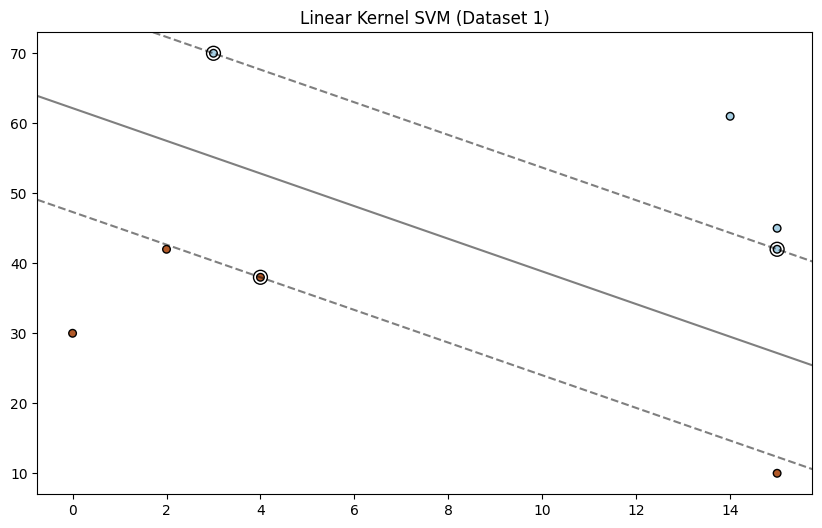

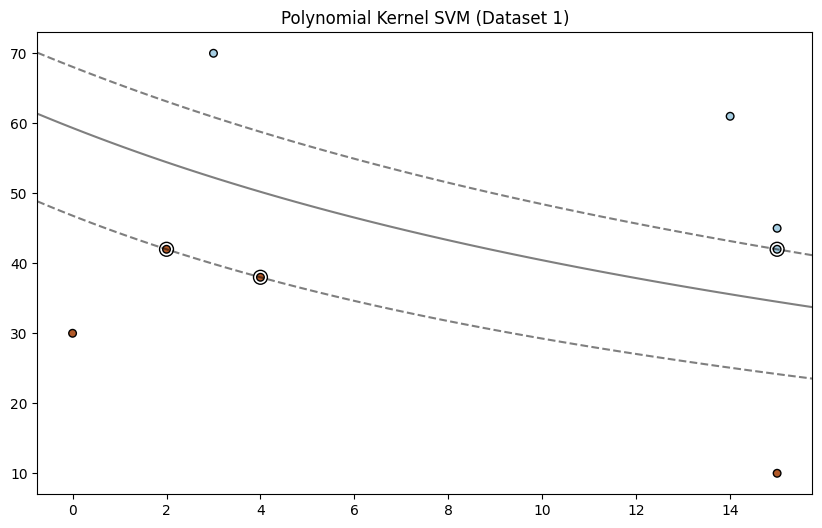

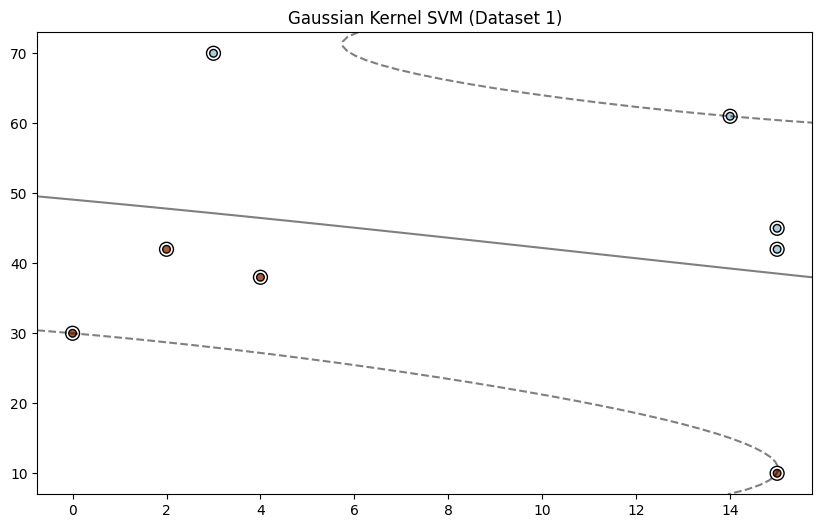

In [13]:
# Train a SVM classifier with a linear kernel

X1= np.array(X1)
y1= np.array(y1)

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X1, y1)
plot_svm_decision_boundary(clf_linear, X1, y1, title="Linear Kernel SVM (Dataset 1)")

# Train a SVM classifier with a polynomial kernel
clf_poly = svm.SVC(kernel='poly', degree=3)
clf_poly.fit(X1, y1)
plot_svm_decision_boundary(clf_poly, X1, y1, title="Polynomial Kernel SVM (Dataset 1)")

# Train a SVM classifier with an RBF kernel
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X1, y1)
plot_svm_decision_boundary(clf_rbf, X1, y1, title="Gaussian Kernel SVM (Dataset 1)")


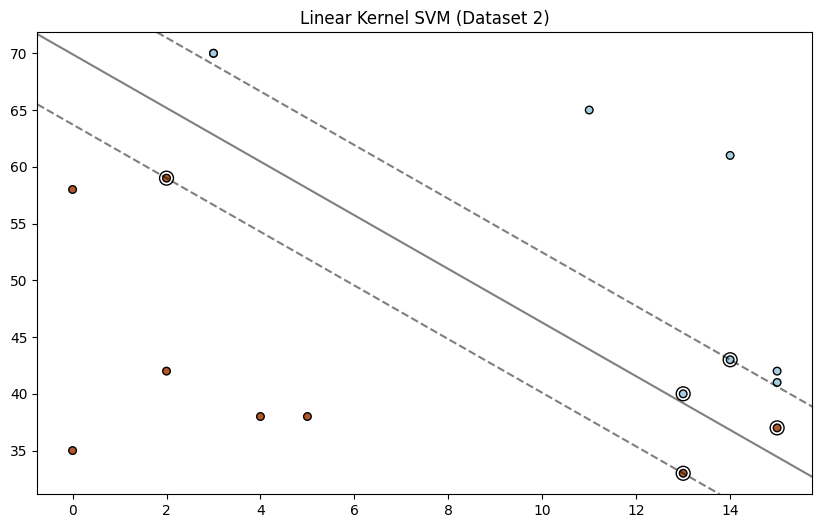

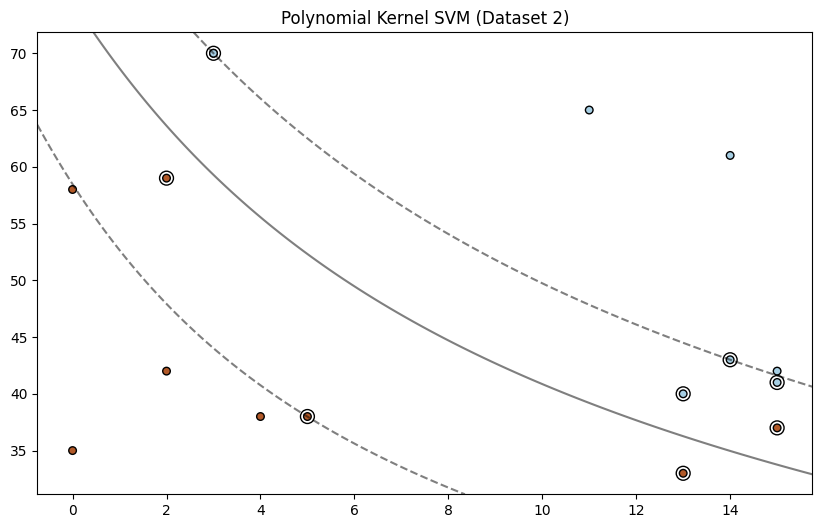

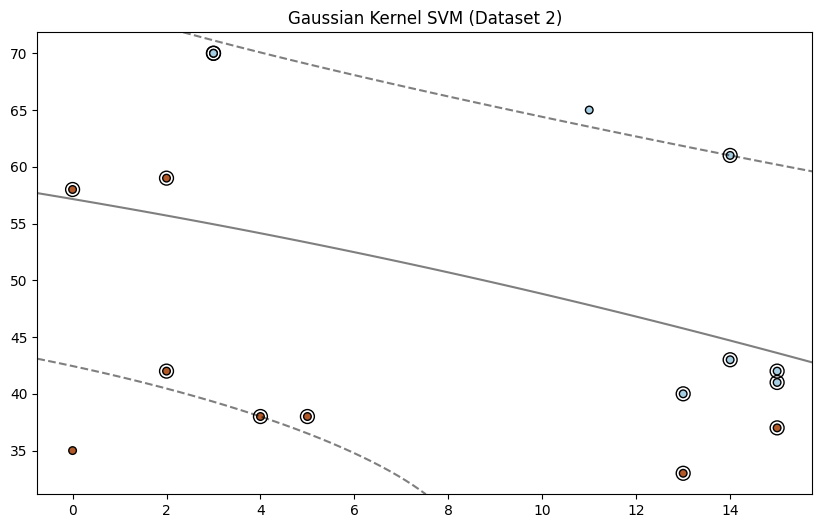

In [14]:
X2= np.array(X2)
y2= np.array(y2)

clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X2, y2)
plot_svm_decision_boundary(clf_linear, X2, y2, title="Linear Kernel SVM (Dataset 2)")

# Train a SVM classifier with a polynomial kernel
clf_poly = svm.SVC(kernel='poly', degree=3)
clf_poly.fit(X2, y2)
plot_svm_decision_boundary(clf_poly, X2, y2, title="Polynomial Kernel SVM (Dataset 2)")

# Train a SVM classifier with an RBF kernel
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X2, y2)
plot_svm_decision_boundary(clf_rbf, X2, y2, title="Gaussian Kernel SVM (Dataset 2)")


In [134]:
def plot_svm_3d(X, y, svc):
    from mpl_toolkits.mplot3d import Axes3D
    plt.figure()
    X = np.asarray(X)
    ax = plt.axes(projection='3d')
    # ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')

    zz = lambda xx,yy: (-svc.intercept_[0]-svc.coef_[0][0]*xx-svc.coef_[0][1]*yy) / svc.coef_[0][2]
    tmpx = np.linspace(0, 70, 10)
    tmpy = np.linspace(0, 70, 10)
    xx,yy = np.meshgrid(tmpx,tmpy)
    ax.plot_surface(xx, yy, zz(xx,yy), alpha = 0.5, cmap = 'Purples')
    for ii in range(0,90,1):
        ax.view_init(elev=15, azim=ii)
    plt.title("Linear kernel on dataset 3 (3D)")
    plt.show()

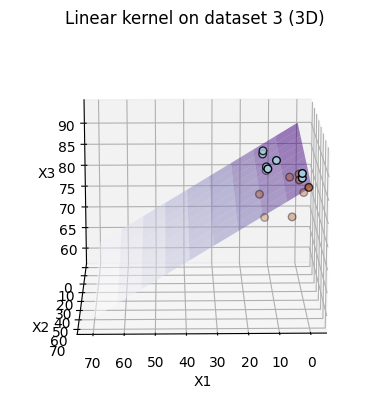

In [135]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X3, y3)
plot_svm_3d(X3, y3, clf_linear)